#HOW MUCH DID IT RAIN

In [1]:
#importing the libraries
# Import the libraries
%matplotlib inline
import os
import os.path
import sys
import pandas
import pandas as pd
from pandas import Series,DataFrame
import datetime
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from random import sample
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, recall_score, precision_score
import matplotlib
import random
random.seed(0)
matplotlib.style.use('ggplot') ## ggplot style seems to look nicer
from pandas.tools.plotting import parallel_coordinates
import warnings
warnings.filterwarnings("ignore")
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks
import pandas as pd

In [2]:
#getting the data
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [61]:
print 'the column names:',test.columns.values
print 'the shape of the data is:',train.shape

the column names: ['Id' 'minutes_past' 'radardist_km' 'Ref' 'Ref_5x5_10th' 'Ref_5x5_50th'
 'Ref_5x5_90th' 'RefComposite' 'RefComposite_5x5_10th'
 'RefComposite_5x5_50th' 'RefComposite_5x5_90th' 'RhoHV' 'RhoHV_5x5_10th'
 'RhoHV_5x5_50th' 'RhoHV_5x5_90th' 'Zdr' 'Zdr_5x5_10th' 'Zdr_5x5_50th'
 'Zdr_5x5_90th' 'Kdp' 'Kdp_5x5_10th' 'Kdp_5x5_50th' 'Kdp_5x5_90th']
the shape of the data is: (13765201, 24)


In [4]:
print 'the column names:',train.columns.values
print 'the shape of the data is:',train.shape

the column names: ['Id' 'minutes_past' 'radardist_km' 'Ref' 'Ref_5x5_10th' 'Ref_5x5_50th'
 'Ref_5x5_90th' 'RefComposite' 'RefComposite_5x5_10th'
 'RefComposite_5x5_50th' 'RefComposite_5x5_90th' 'RhoHV' 'RhoHV_5x5_10th'
 'RhoHV_5x5_50th' 'RhoHV_5x5_90th' 'Zdr' 'Zdr_5x5_10th' 'Zdr_5x5_50th'
 'Zdr_5x5_90th' 'Kdp' 'Kdp_5x5_10th' 'Kdp_5x5_50th' 'Kdp_5x5_90th'
 'Expected']
the shape of the data is: (13765201, 24)


In [5]:
#get the stats for train data
train.isnull().sum()

Id                              0
minutes_past                    0
radardist_km                    0
Ref                       7415826
Ref_5x5_10th              8481213
Ref_5x5_50th              7408719
Ref_5x5_90th              6213920
RefComposite              7048858
RefComposite_5x5_10th     8009528
RefComposite_5x5_50th     7053538
RefComposite_5x5_90th     5935998
RhoHV                     8830285
RhoHV_5x5_10th            9632047
RhoHV_5x5_50th            8828633
RhoHV_5x5_90th            7859617
Zdr                       8830285
Zdr_5x5_10th              9632047
Zdr_5x5_50th              8828633
Zdr_5x5_90th              7859617
Kdp                       9582566
Kdp_5x5_10th             10336419
Kdp_5x5_50th              9577920
Kdp_5x5_90th              8712425
Expected                        0
dtype: int64

In [6]:
#getting a glimpse of data
train.head(10)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
1,1,16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
2,1,25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
3,1,35,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
4,1,45,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
5,1,55,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254
6,2,1,2,9.0,5.0,7.5,10.5,15.0,10.5,16.5,...,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
7,2,6,2,26.5,22.5,25.5,31.5,26.5,26.5,28.5,...,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016
8,2,11,2,21.5,15.5,20.5,25.0,26.5,23.5,25.0,...,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016
9,2,16,2,18.0,14.0,17.5,21.0,20.5,18.0,20.5,...,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016


In [7]:
train.describe()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
count,13765201.000000,13765201.000000,13765201.000000,6349375.000000,5283988.000000,6356482.000000,7551281.000000,6716343.000000,5755673.000000,6711663.000000,...,5905584.000000,4934916.000000,4133154.000000,4936568.000000,5905584.000000,4182635.000000,3428782.000000,4187281.000000,5052776.000000,13765201.000000
mean,592336.986614,29.523733,11.067943,22.926658,19.952271,22.610287,25.898461,24.711081,22.158238,24.420753,...,1.015272,0.536709,-0.719008,0.337622,2.072870,0.035452,-3.482325,-0.473655,4.079836,108.626306
std,340856.086254,17.308131,4.206618,10.355157,9.208166,10.053000,11.109579,10.689622,9.702705,10.424526,...,0.048616,1.510399,1.006068,0.938644,1.670194,3.869725,2.792120,2.263046,4.147337,548.605805
min,1.000000,0.000000,0.000000,-31.000000,-32.000000,-32.000000,-28.500000,-32.000000,-31.000000,-27.500000,...,0.208333,-7.875000,-7.875000,-7.875000,-7.875000,-96.040000,-80.790000,-78.770004,-100.200005,0.010000
25%,296897.000000,15.000000,9.000000,16.000000,14.000000,16.000000,18.000000,17.500000,16.000000,17.500000,...,0.998333,-0.187500,-1.125000,-0.062500,1.062500,-1.410004,-4.580002,-0.710007,2.069992,0.254000
50%,592199.000000,30.000000,11.000000,22.500000,20.000000,22.500000,25.500000,24.000000,22.000000,24.000000,...,1.011667,0.375000,-0.625000,0.250000,1.687500,0.000000,-2.820007,0.000000,3.519989,1.016000
75%,889582.000000,44.000000,14.000000,29.500000,26.000000,29.000000,33.500000,31.500000,28.500000,31.500000,...,1.051667,1.062500,-0.187500,0.687500,2.625000,1.750000,-1.760010,0.349991,5.639999,3.810002
max,1180945.000000,59.000000,21.000000,71.000000,62.500000,69.000000,72.500000,92.500000,66.000000,71.000000,...,1.051667,7.937500,7.937500,7.937500,7.937500,179.750000,3.519989,12.800003,144.600000,33017.730000


In [8]:
train_df_grouped = train.groupby(['Id'])
exp_rainfall = np.sort(np.array(train_df_grouped['Expected'].aggregate('mean')))

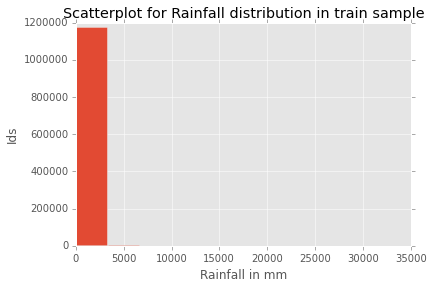

In [9]:
plt.figure()
plt.hist(exp_rainfall)
plt.title("Scatterplot for Rainfall distribution in train sample")
plt.xlabel("Rainfall in mm")
plt.ylabel("Ids")
plt.savefig("ExpectedRainfall.png")
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x1108a2150>],
 'caps': [<matplotlib.lines.Line2D at 0x110857110>,
 'fliers': [<matplotlib.lines.Line2D at 0x110830310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x110857d90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1108a23d0>,
  <matplotlib.lines.Line2D at 0x1108a2a90>]}

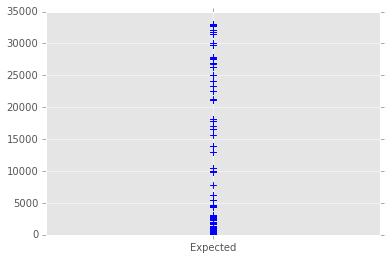

In [15]:
expected=train[['Expected']]
expected.boxplot(column='Expected')

In [16]:
len(train)

13765201

In [17]:
#getting the nulls, we may remove columns which have more than 60% of nulls
def remove_cols(dataset,thres):
    per_nulls=dataset.isnull().sum()/len(train)*100
    print per_nulls[per_nulls>thres].index
    return per_nulls[per_nulls>thres].index

In [18]:
#getting the eligible data
usage_eligible = train.drop(remove_cols(train,thres=70), axis=1)

Index([u'Kdp_5x5_10th'], dtype='object')


In [19]:
#usage eligible stats
list(usage_eligible)

['Id',
 'minutes_past',
 'radardist_km',
 'Ref',
 'Ref_5x5_10th',
 'Ref_5x5_50th',
 'Ref_5x5_90th',
 'RefComposite',
 'RefComposite_5x5_10th',
 'RefComposite_5x5_50th',
 'RefComposite_5x5_90th',
 'RhoHV',
 'RhoHV_5x5_10th',
 'RhoHV_5x5_50th',
 'RhoHV_5x5_90th',
 'Zdr',
 'Zdr_5x5_10th',
 'Zdr_5x5_50th',
 'Zdr_5x5_90th',
 'Kdp',
 'Kdp_5x5_50th',
 'Kdp_5x5_90th',
 'Expected']

In [20]:
#aggregating the data at Id level
aggregated_usage_data=usage_eligible.groupby(['Id']).agg({
                                                              'Ref':np.mean,
                                                              'Ref_5x5_10th':np.mean,
                                                              'Ref_5x5_50th':np.mean,
                                                              'Ref_5x5_90th':np.mean,
                                                              'RefComposite':np.mean,
                                                              'RefComposite_5x5_10th':np.mean,
                                                              'RefComposite_5x5_50th':np.mean,
                                                              'RefComposite_5x5_90th':np.mean,
                                                              'RhoHV':np.mean,
                                                              'RhoHV_5x5_10th':np.mean,
                                                              'RhoHV_5x5_50th':np.mean,
                                                              'RhoHV_5x5_90th':np.mean,
                                                              'Zdr':np.mean,
                                                              'Zdr_5x5_10th':np.mean,
                                                              'Zdr_5x5_50th':np.mean,
                                                              'Zdr_5x5_90th':np.mean,
                                                              'Kdp':np.mean,
                                                              'Kdp_5x5_50th':np.mean,
                                                              'Kdp_5x5_90th':np.mean,
                                                              'Expected':np.mean})
aggregated_usage_data.head(5)

,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Expected,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.116661,1.000000,0.998611,17.375,0.119792,0.998333,0.993611,21.333333,0.416667,0.380208,-0.319096,1.016001,13.666667,20.375000,22.666667,-0.288187,0.781250,16.625,22.916667,25.916667
3,NaN,0.801667,NaN,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,26.162014,NaN,NaN,NaN,NaN,2.062500,NaN,NaN,8.500000
4,6.329994,1.015833,0.988333,25.800,NaN,0.988333,NaN,30.269231,0.500000,-1.125000,0.000000,4.064002,20.071429,21.090909,26.666667,7.029999,1.515625,26.600,25.115385,32.230769
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.700440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#getting the stats
print 'the shape of aggregated_usage data',aggregated_usage_data.shape

the shape of aggregated_usage data (1180945, 20)


In [22]:
#filling the NA with zero
aggregated_usage_data.fillna(0,inplace=True)

In [23]:
aggregated_usage_data.head()

,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Expected,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,1.116661,1.000000,0.998611,17.375,0.119792,0.998333,0.993611,21.333333,0.416667,0.380208,-0.319096,1.016001,13.666667,20.375000,22.666667,-0.288187,0.781250,16.625,22.916667,25.916667
3,0.000000,0.801667,0.000000,0.000,0.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.000000,26.162014,0.000000,0.000000,0.000000,0.000000,2.062500,0.000,0.000000,8.500000
4,6.329994,1.015833,0.988333,25.800,0.000000,0.988333,0.000000,30.269231,0.500000,-1.125000,0.000000,4.064002,20.071429,21.090909,26.666667,7.029999,1.515625,26.600,25.115385,32.230769
5,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


#Feature Engineering

In [24]:
aggregated_usage_data.head()

,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Expected,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
Id,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
2,1.116661,1.000000,0.998611,17.375,0.119792,0.998333,0.993611,21.333333,0.416667,0.380208,-0.319096,1.016001,13.666667,20.375000,22.666667,-0.288187,0.781250,16.625,22.916667,25.916667
3,0.000000,0.801667,0.000000,0.000,0.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.000000,26.162014,0.000000,0.000000,0.000000,0.000000,2.062500,0.000,0.000000,8.500000
4,6.329994,1.015833,0.988333,25.800,0.000000,0.988333,0.000000,30.269231,0.500000,-1.125000,0.000000,4.064002,20.071429,21.090909,26.666667,7.029999,1.515625,26.600,25.115385,32.230769
5,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,774.700440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


In [25]:
new_data=aggregated_usage_data.reset_index()

In [26]:
new_data.head()

,Id,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,...,Kdp_5x5_50th,Expected,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
0,1,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.254000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,2,1.116661,1.000000,0.998611,17.375,0.119792,0.998333,0.993611,21.333333,0.416667,...,-0.319096,1.016001,13.666667,20.375000,22.666667,-0.288187,0.781250,16.625,22.916667,25.916667
2,3,0.000000,0.801667,0.000000,0.000,0.000000,0.000000,0.000000,8.500000,0.000000,...,0.000000,26.162014,0.000000,0.000000,0.000000,0.000000,2.062500,0.000,0.000000,8.500000
3,4,6.329994,1.015833,0.988333,25.800,0.000000,0.988333,0.000000,30.269231,0.500000,...,0.000000,4.064002,20.071429,21.090909,26.666667,7.029999,1.515625,26.600,25.115385,32.230769
4,5,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,774.700440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


In [27]:
new_data.drop(['Id','Expected'],axis=1,inplace=True)

In [28]:
new_data.head()

,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,1.116661,1.000000,0.998611,17.375,0.119792,0.998333,0.993611,21.333333,0.416667,0.380208,-0.319096,13.666667,20.375000,22.666667,-0.288187,0.781250,16.625,22.916667,25.916667
2,0.000000,0.801667,0.000000,0.000,0.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.062500,0.000,0.000000,8.500000
3,6.329994,1.015833,0.988333,25.800,0.000000,0.988333,0.000000,30.269231,0.500000,-1.125000,0.000000,20.071429,21.090909,26.666667,7.029999,1.515625,26.600,25.115385,32.230769
4,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000


In [29]:
ref_data=new_data[['Ref','Ref_5x5_10th','Ref_5x5_50th','Ref_5x5_90th']]
ref_data.head(10)
ref_data_normalized=ref_data[['Ref_5x5_10th','Ref_5x5_50th','Ref_5x5_90th']].astype('float').div(ref_data['Ref'].astype('float'),axis='index')
ref_data_normalized.head(10)
ref_data_normalized.replace(np.inf,np.nan,inplace=True)
ref_data_normalized.replace(-np.inf,np.nan,inplace=True)
ref_data_normalized.fillna(0,inplace=True)
ref_data_normalized_feature=ref_data_normalized
ref_data_normalized_feature.head()

,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th
0,0.000000,0.000000,0.000000
1,0.822055,1.045113,1.283208
2,0.000000,0.000000,0.000000
3,0.754565,0.969925,1.137941
4,0.000000,0.000000,0.000000


In [30]:
ref_composite=new_data[['RefComposite','RefComposite_5x5_10th','RefComposite_5x5_50th','RefComposite_5x5_90th']]
ref_composite_normalized=ref_composite[['RefComposite_5x5_10th','RefComposite_5x5_50th','RefComposite_5x5_90th']].astype('float').div(ref_composite['RefComposite'].astype('float'),axis='index')
ref_composite_normalized.replace(np.inf,np.nan,inplace=True)
ref_composite_normalized.replace(-np.inf,np.nan,inplace=True)
ref_composite_normalized.fillna(0,inplace=True)
ref_composite_normalized_feature=ref_composite_normalized
ref_composite_normalized_feature.head()

,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th
0,0.000000,0.000000,0.000000
1,0.898897,1.011029,1.143382
2,0.000000,0.000000,0.000000
3,0.790909,0.941827,1.208654
4,0.000000,0.000000,0.000000


In [31]:
ref_rhov=new_data[['RhoHV','RhoHV_5x5_10th','RhoHV_5x5_50th','RhoHV_5x5_90th']]
ref_rhov_normalized=ref_rhov[['RhoHV_5x5_10th','RhoHV_5x5_50th','RhoHV_5x5_90th']].astype('float').div(ref_rhov['RhoHV'].astype('float'),axis='index')
ref_rhov_normalized.replace(np.inf,np.nan,inplace=True)
ref_rhov_normalized.replace(-np.inf,np.nan,inplace=True)
ref_rhov_normalized.fillna(0,inplace=True)
ref_rhov_normalized_feature=ref_rhov_normalized
ref_rhov_normalized_feature.head()

,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th
0,0.000000,0.000000,0.000000
1,0.994993,0.999722,1.001391
2,0.000000,0.000000,0.000000
3,0.000000,1.000000,1.027825
4,0.000000,0.000000,0.000000


In [32]:
ref_zdr=new_data[['Zdr','Zdr_5x5_10th','Zdr_5x5_50th','Zdr_5x5_90th']]
ref_zdr_normalized=ref_zdr[['Zdr_5x5_10th','Zdr_5x5_50th','Zdr_5x5_90th']].astype('float').div(ref_zdr['Zdr'].astype('float'),axis='index')
ref_zdr_normalized.replace(np.inf,np.nan,inplace=True)
ref_zdr_normalized.replace(-np.inf,np.nan,inplace=True)
ref_zdr_normalized.fillna(0,inplace=True)
ref_zdr_normalized_feature=ref_zdr_normalized
ref_zdr_normalized_feature.head()

,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th
0,0.000000,0.000000,0.000000
1,0.315068,1.095890,2.054795
2,0.000000,0.000000,0.000000
3,-0.000000,-0.444444,-1.347222
4,0.000000,0.000000,0.000000


In [33]:
ref_kdp=new_data[['Kdp','Kdp_5x5_50th','Kdp_5x5_90th']]
ref_kdp_normalized=ref_kdp[['Kdp_5x5_50th','Kdp_5x5_90th']].astype('float').div(ref_kdp['Kdp'].astype('float'),axis='index')
ref_kdp_normalized.replace(np.inf,np.nan,inplace=True)
ref_kdp_normalized.replace(-np.inf,np.nan,inplace=True)
ref_kdp_normalized.fillna(0,inplace=True)
ref_kdp_normalized_feature=ref_kdp_normalized
ref_kdp_normalized_feature.head()

,Kdp_5x5_50th,Kdp_5x5_90th
0,0.000000,0.000000
1,1.107252,-3.874777
2,0.000000,0.000000
3,0.000000,0.900426
4,0.000000,0.000000


In [34]:
#combining all the feature sets
train_features=pd.concat([ref_zdr_normalized_feature,ref_kdp_normalized_feature,ref_rhov_normalized_feature,ref_composite_normalized_feature,ref_data_normalized_feature],axis=1)
train_features.to_csv('train_features.csv')
train_features.head()

,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp_5x5_50th,Kdp_5x5_90th,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.315068,1.095890,2.054795,1.107252,-3.874777,0.994993,0.999722,1.001391,0.898897,1.011029,1.143382,0.822055,1.045113,1.283208
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.000000,-0.444444,-1.347222,0.000000,0.900426,0.000000,1.000000,1.027825,0.790909,0.941827,1.208654,0.754565,0.969925,1.137941
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
#getting the test dataframe
test.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,...,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th
0,1,1,8,NaN,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,8,10.0,NaN,10,18.0,11.5,NaN,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8,8,NaN,NaN,7,14.5,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,12,8,14.0,NaN,9,16.0,14.0,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,15,8,10.5,NaN,9,15.5,13.5,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#eligible data for test
test_data=test.drop(['Kdp_5x5_10th'],axis=1)

In [37]:
#aggregating the test data
aggregated_usage_data_test=test_data.groupby(['Id']).agg({
                                                              'Ref':np.mean,
                                                              'Ref_5x5_10th':np.mean,
                                                              'Ref_5x5_50th':np.mean,
                                                              'Ref_5x5_90th':np.mean,
                                                              'RefComposite':np.mean,
                                                              'RefComposite_5x5_10th':np.mean,
                                                              'RefComposite_5x5_50th':np.mean,
                                                              'RefComposite_5x5_90th':np.mean,
                                                              'RhoHV':np.mean,
                                                              'RhoHV_5x5_10th':np.mean,
                                                              'RhoHV_5x5_50th':np.mean,
                                                              'RhoHV_5x5_90th':np.mean,
                                                              'Zdr':np.mean,
                                                              'Zdr_5x5_10th':np.mean,
                                                              'Zdr_5x5_50th':np.mean,
                                                              'Zdr_5x5_90th':np.mean,
                                                              'Kdp':np.mean,
                                                              'Kdp_5x5_50th':np.mean,
                                                              'Kdp_5x5_90th':np.mean})
aggregated_usage_data_test.head(5)

,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
Id,,,,,,,,,,,,,,,,,,,
1,2.601664,1.043571,1.011667,8.277778,-1.7500,0.990000,0.848333,13.461538,0.062500,-0.546875,-1.290003,NaN,NaN,11.375000,-1.523336,2.598214,10.500000,8.666667,14.153846
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000
3,5.382997,0.981333,0.927333,24.111111,-0.5625,0.954667,0.895333,34.700000,0.456250,0.418750,0.169997,17.125000,16.400000,25.055556,0.219994,1.825000,23.722222,25.222222,36.350000
4,5.563329,0.982143,0.967667,29.812500,-0.5375,0.970556,0.931667,35.625000,0.177083,0.100000,-0.140002,28.642857,28.944444,32.000000,0.911996,1.241071,30.812500,32.666667,35.250000
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
aggregated_usage_data_test.reset_index(inplace=True)
ids_select=aggregated_usage_data_test[['Id']]
ids_select.head()

,Id
0,1
1,2
2,3
3,4
4,5


In [39]:
aggregated_usage_data_test.set_index('Id',inplace=True)

In [40]:
test_eligible=aggregated_usage_data_test.reset_index()
test_eligible.fillna(0,inplace=True)
test_eligible_for_feature=test_eligible
test_eligible_for_feature.head()

,Id,Kdp_5x5_90th,RhoHV_5x5_90th,RhoHV,Ref_5x5_50th,Zdr_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_10th,Ref_5x5_90th,Zdr_5x5_50th,Zdr,Kdp_5x5_50th,Ref_5x5_10th,RefComposite_5x5_10th,RefComposite,Kdp,Zdr_5x5_90th,Ref,RefComposite_5x5_50th,RefComposite_5x5_90th
0,1,2.601664,1.043571,1.011667,8.277778,-1.7500,0.990000,0.848333,13.461538,0.062500,-0.546875,-1.290003,0.000000,0.000000,11.375000,-1.523336,2.598214,10.500000,8.666667,14.153846
1,2,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
2,3,5.382997,0.981333,0.927333,24.111111,-0.5625,0.954667,0.895333,34.700000,0.456250,0.418750,0.169997,17.125000,16.400000,25.055556,0.219994,1.825000,23.722222,25.222222,36.350000
3,4,5.563329,0.982143,0.967667,29.812500,-0.5375,0.970556,0.931667,35.625000,0.177083,0.100000,-0.140002,28.642857,28.944444,32.000000,0.911996,1.241071,30.812500,32.666667,35.250000
4,5,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
#building features on test data also
test_eligible_for_feature.drop(['Id'],axis=1,inplace=True)

In [42]:
test_feature=test_eligible_for_feature
test_feature.head()
len(test_feature)

717625

In [43]:
ref_data_test=test_feature[['Ref','Ref_5x5_10th','Ref_5x5_50th','Ref_5x5_90th']]
ref_data_normalized_test=ref_data_test[['Ref_5x5_10th','Ref_5x5_50th','Ref_5x5_90th']].astype('float').div(ref_data_test['Ref'].astype('float'),axis='index')
ref_data_normalized_test.head(10)
len(ref_data_normalized_test)
ref_data_normalized_test.replace(np.inf,np.nan,inplace=True)
ref_data_normalized_test.replace(-np.inf,np.nan,inplace=True)
ref_data_normalized_test.fillna(0,inplace=True)
ref_data_normalized_test.head()
#len(ref_data_normalized_test)

,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th
0,0.000000,0.788360,1.282051
1,0.000000,0.000000,0.000000
2,0.721897,1.016393,1.462763
3,0.929586,0.967546,1.156187
4,0.000000,0.000000,0.000000


In [56]:
ref_composite_test=test_feature[['RefComposite','RefComposite_5x5_10th','RefComposite_5x5_50th','RefComposite_5x5_90th']]
ref_composite_normalized_test=ref_composite_test[['RefComposite_5x5_10th','RefComposite_5x5_50th','RefComposite_5x5_90th']].astype('float').div(ref_composite_test['RefComposite'].astype('float'),axis='index')
ref_composite_normalized_test.replace(np.inf,np.nan,inplace=True)
ref_composite_normalized_test.replace(-np.inf,np.nan,inplace=True)
ref_composite_normalized_test.fillna(0,inplace=True)
ref_composite_normalized_test.head()

,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th
0,0.000000,0.761905,1.244294
1,0.000000,0.000000,0.000000
2,0.654545,1.006652,1.450776
3,0.904514,1.020833,1.101562
4,0.000000,0.000000,0.000000


In [57]:
ref_rhov_test=test_feature[['RhoHV','RhoHV_5x5_10th','RhoHV_5x5_50th','RhoHV_5x5_90th']]
ref_rhov_normalized_test=ref_rhov_test[['RhoHV_5x5_10th','RhoHV_5x5_50th','RhoHV_5x5_90th']].astype('float').div(ref_rhov_test['RhoHV'].astype('float'),axis='index')
ref_rhov_normalized_test.replace(np.inf,np.nan,inplace=True)
ref_rhov_normalized_test.replace(-np.inf,np.nan,inplace=True)
ref_rhov_normalized_test.fillna(0,inplace=True)
ref_rhov_normalized_test.head()

,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th
0,0.838550,0.978583,1.031537
1,0.000000,0.000000,0.000000
2,0.965492,1.029475,1.058231
3,0.962797,1.002985,1.014960
4,0.000000,0.000000,0.000000


In [58]:
ref_zdr_test=test_feature[['Zdr','Zdr_5x5_10th','Zdr_5x5_50th','Zdr_5x5_90th']]
ref_zdr_normalized_test=ref_zdr_test[['Zdr_5x5_10th','Zdr_5x5_50th','Zdr_5x5_90th']].astype('float').div(ref_zdr_test['Zdr'].astype('float'),axis='index')
ref_zdr_normalized_test.head()
ref_zdr_normalized_test.replace(np.inf,np.nan,inplace=True)
ref_zdr_normalized_test.replace(-np.inf,np.nan,inplace=True)
ref_zdr_normalized_test.fillna(0,inplace=True)
ref_zdr_normalized_test.head()

,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th
0,3.200000,-0.114286,-4.751020
1,0.000000,0.000000,0.000000
2,-1.343284,1.089552,4.358209
3,-5.375000,1.770833,12.410714
4,0.000000,0.000000,0.000000


In [59]:
ref_kdp_test=test_feature[['Kdp','Kdp_5x5_50th','Kdp_5x5_90th']]
ref_kdp_normalized_new=ref_kdp_test[['Kdp_5x5_50th','Kdp_5x5_90th']].astype('float').div(ref_kdp_test['Kdp'].astype('float'),axis='index')
ref_kdp_normalized_new.replace(np.inf,np.nan,inplace=True)
ref_kdp_normalized_new.replace(-np.inf,np.nan,inplace=True)
ref_kdp_normalized_new.fillna(0,inplace=True)
ref_kdp_normalized_new.head()

,Kdp_5x5_50th,Kdp_5x5_90th
0,0.846828,-1.707873
1,0.000000,0.000000
2,0.772735,24.468885
3,-0.153512,6.100165
4,0.000000,0.000000


In [60]:
merged_test=pd.concat([ref_data_normalized_test,ref_composite_normalized_test,ref_rhov_normalized_test,ref_zdr_normalized_test,ref_kdp_normalized_new],axis=1)
merged_test.head()

,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp_5x5_50th,Kdp_5x5_90th
0,0.000000,0.788360,1.282051,0.000000,0.761905,1.244294,0.838550,0.978583,1.031537,3.200000,-0.114286,-4.751020,0.846828,-1.707873
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.721897,1.016393,1.462763,0.654545,1.006652,1.450776,0.965492,1.029475,1.058231,-1.343284,1.089552,4.358209,0.772735,24.468885
3,0.929586,0.967546,1.156187,0.904514,1.020833,1.101562,0.962797,1.002985,1.014960,-5.375000,1.770833,12.410714,-0.153512,6.100165
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [49]:
X_train_new=train_features
Y_train_new=aggregated_usage_data["Expected"]
X_test_new=merged_test
ids_new=ids_select[['Id']]
X_train_new.fillna(0,inplace=True)
Y_train_new.fillna(0,inplace=True)

In [51]:
scores=[]
submission=Series()
lreg_new = LinearRegression()
lreg_new.fit(X_train_new, Y_train_new)
pred_Y = lreg_new.predict(X_test_new)
scores.append(lreg_new.score(X_train_new, Y_train_new))

In [54]:
submission = submission.append(Series(pred_Y, index=ids_new))

In [55]:
submission

1           -46.755991
2           286.213899
3           -46.453015
4           392.178466
5           286.213899
6           313.002182
7           530.786440
8           185.536689
9           286.213899
10          270.702898
11           85.264659
12          292.642003
13          206.904068
14          134.223070
15          286.213899
16          286.213899
17          286.213899
18         -884.548866
19          290.966697
20          286.213899
21          286.213899
22          158.734267
23           60.334987
24          286.213899
25          286.213899
26          288.177871
27         1796.060381
28          286.213899
29          286.213899
30          131.642145
              ...     
717596      260.444125
717597      286.213899
717598    -2880.939292
717599      162.334205
717600      214.365652
717601     -115.965982
717602      286.213899
717603      245.798073
717604      291.288245
717605       82.370557
717606      286.213899
717607      286.213899
717608     